# Importer les librairies

In [2]:
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Importer les données

In [26]:
data = pd.read_csv("Data/titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions

## 1. Préparation des données

Remplissez la function `preprocess` ci-dessus. Celle-ci doit:
1. Supprimez les colonnes `PassengerId`, `Name`, `Ticket`, `Cabin`.
2. Supprimez les lignes contenant au moins une valeur manquante.
3. Créer une variable `FamilySize` qui est correspond à `SibSp` + `Parch` + 1. Supprimez les variables `SibSp` et `Parch`.
4. Recalculer le prix du billet `Fare` en divisant `Fare` par `FamilySize`.
5. Encoder les variables qualitatives `Sex`, `Embarked` et `Pclass` avec l'argument `drop_first=True`.

In [27]:
def preprocess(data: pd.DataFrame) -> pd.DataFrame:
    
    """La fonction prépare les données à l'analyse.
    
    Args:
        data (pd.DataFrame): La dataframe originale
        
    Returns:
        pd.DataFrame: La dataframe preprocessée et prête à être analysée.
    """
    # Faire une copie de la dataframe originale
    data_preprocessed = data.copy()
    
    # Supprimer les variables `PassengerId`, `Name`, `Ticket` & `Cabin`
    data_preprocessed.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
    
    # Supprimer les lignes contenant au moins une valeur manquante
    data_preprocessed = data_preprocessed.dropna(axis=0) 

    # Créer une variable `FamilySize` et supprimer les variables `SibSp` et `Parch`
    data_preprocessed['FamilySize'] = data_preprocessed['SibSp'] + data_preprocessed['Parch'] + 1
    data_preprocessed.drop(['SibSp', 'Parch'], axis=1, inplace=True)
    
    # Recalculer le prix du billet
    data_preprocessed['Fare'] = data_preprocessed['Fare'] / data_preprocessed['FamilySize'].where(data_preprocessed['FamilySize'] != 0, 1)
    
    # One-hot encoding de `Sex`, `Embarked` et `Pclass`
    data_preprocessed = pd.get_dummies(data_preprocessed, columns=['Sex', 'Embarked'], drop_first=True, dtype=int)

    

    
    # CHECK: NE PAS TOUCHER
    for col in ["PassengerId", "Name", "Ticket", "Cabin", "SibSp", "Parch"]:
        assert col not in data_preprocessed, f"{col} n'a pas été retiré."
    assert data_preprocessed.isna().sum().sum() == 0, "Il reste encore des NaN à supprimer."
    assert "FamilySize" in data_preprocessed.columns, "La colonne `FamilySize` n'a pas été créée."
    assert data_preprocessed.loc[0, "Fare"] == 3.625, "La colonne `Fare` n'a pas été recalculée."
    for col in [col for col in data_preprocessed if col.startswith("Embarked")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."
    for col in [col for col in data_preprocessed if col.startswith("Sex")]:
        assert data_preprocessed[col].nunique() == 2, f"{col} n'a pas été encodé."

    
    return data_preprocessed


Le résultat de la function doit vous donner exactement le tableau ci-dessous.

In [5]:
# Preprocess les données à l'aide de la function `preprocess`
data_clean = preprocess(data)
display(data_clean)

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,3.625000,2,1,0,1
1,1,1,38.0,35.641650,2,0,0,0
2,1,3,26.0,7.925000,1,0,0,1
3,1,1,35.0,26.550000,2,0,0,1
4,0,3,35.0,8.050000,1,1,0,1
...,...,...,...,...,...,...,...,...
885,0,3,39.0,4.854167,6,0,1,0
886,0,2,27.0,13.000000,1,1,0,1
887,1,1,19.0,30.000000,1,0,0,1
889,1,1,26.0,30.000000,1,1,0,0


## 2. Inférence statistique (4 pts)

**Q1: L'âge moyen des passagers du Titanic est-il le même que l'âge moyen de la population en 1912 (28 ans)?**

1. La variable d'intérêt est l'âge des passagers, c'est une variable de type quantitative.
2. Nous avons donc décidé d'utiliser un histogramme afin de la visualiser

/home/guillaume/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


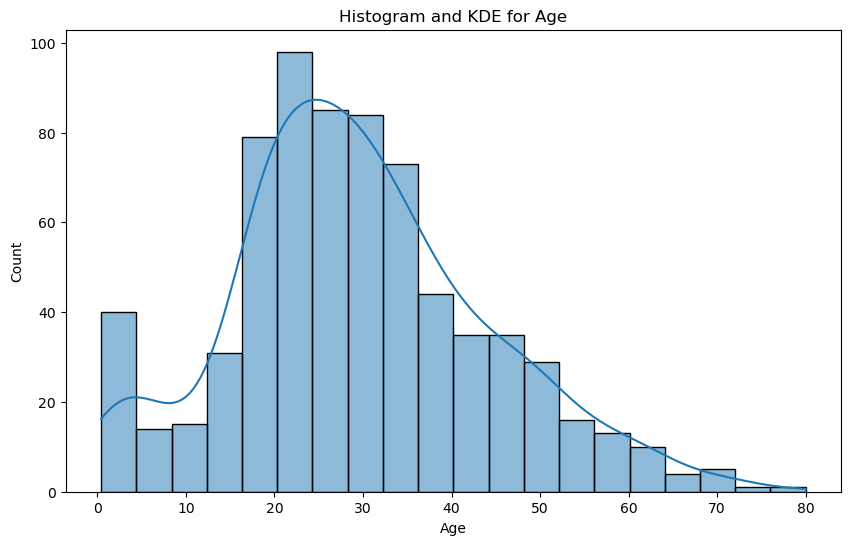

In [6]:
# Créer un histogramme et un KDE pour la variable `Age`
plt.figure(figsize=(10,6))
sns.histplot(data=data_clean, x='Age', kde=True)
plt.title("Histogram and KDE for Age")
plt.show()

3. Notre hypothèse nulle est que l'âge moyen des passagers du Titanic est égal à celui de la population en 1912 (28ans). Notre hypothèse alternative est que l'âge moyen des passagers du Titanic n'est pas de 28 ans : 

\begin{align*}
H_0 &= 28 \quad et \quad H_1\neq 28
\end{align*}

4. Nous allons utiliser un t-test car nous ne possédons pas la variance de la population. Nous utiliserons donc la formule suivante :

$$ t = \frac{\bar{X} - \mu}{s / \sqrt{n}} $$


5. Assumptions :
    L'échantillon est aléatoire, dans le sens où nous utilisons l'ensemble d'un jeux de données qui est aléatoire, et les différentes manipulations (retrait des valeurs nulles) n'en altèrent pas l'aléatoire.
    La taille de l'échantillon est de 712 passagers (largement supérieur à 30)

In [7]:
sample_mean = np.mean(data_clean['Age']) 
sample_std = np.std(data_clean['Age'], ddof=1) 
mu = 28 
n = len(data_clean['Age'])

print("L'âge moyen est de", str(sample_mean))
print("L'écart type de l'échantillon est de", str(sample_std))

L'âge moyen est de 29.64209269662921
L'écart type de l'échantillon est de 14.49293290032352


6. Nous calculons t :

In [8]:
t = (sample_mean - mu)/(sample_std / np.sqrt(n))

print("La statistique t est:", t)

La statistique t est: 3.0233009800374053


7. Cela nous permet ensuite de calculer la p-valeur. Ici, cela nous permettra de rejetter l'hypothèse nulle.

In [9]:
p_valeur = stats.t.cdf(-abs(t), df=n-1) * 2
alpha = 0.05

print("La p-valeur est:", p_valeur)

# Si p-valeur < alpha, on rejète l'hypothèse nulle
if p_valeur < alpha:
    print("Avec un seuil alpha", str(alpha), "on rejette l'hypothèse nulle.")
    print("Statistiquement parlant, les passagers du Titanic ont un âge moyen qui n'est pas dans celui de la population.")
    
# Si p-valeur > alpha, on ne rejète pas l'hypothèse nulle
else:
    print("Avec un seuil alpha", str(alpha), "on ne rejette pas l'hypothèse nulle.")

La p-valeur est: 0.002590259537786662
Avec un seuil alpha 0.05 on rejette l'hypothèse nulle.
Statistiquement parlant, les passagers du Titanic ont un âge moyen qui n'est pas dans celui de la population.


8. Avec une p-value inférieure à 5%, nous possédons assez de preuve pour rejetter l'affirmation selon laquelle l'âge moyen des passagers du Titanic est la même que celui de la population mondiale en 1912. Nous allons évaluer la taille de l'effet grâce à l'équation de Cohen.

$$
d = \frac{{\bar{x}_1 - \bar{x}_2}}{{s}}
$$

In [10]:
cohens_d = (sample_mean - mu) / sample_std

interpretation = ""
if abs(cohens_d) <= 0.3:
    interpretation = "The effect size is small."
elif abs(cohens_d) <= 0.5:
    interpretation = "The effect size is medium."
else:
    interpretation = "The effect size is large."
print("Cohen's d:", cohens_d, interpretation)

Cohen's d: 0.11330299449551398 The effect size is small.



Cela indique que l'âge moyen de la population du Titanic est relativement similaire à l'âge moyen de la population mondiale.

**Q2: La survie dépend-elle de la classe du passager?**

1. Les variables d'intérêts sont Pclass et Survived. 
    Pclass est une variable qualitative ordinale
    Survived est une variable qualitative nominale

2. Nous avons choisi de représenter ces variables avec un "grouped bar chart"

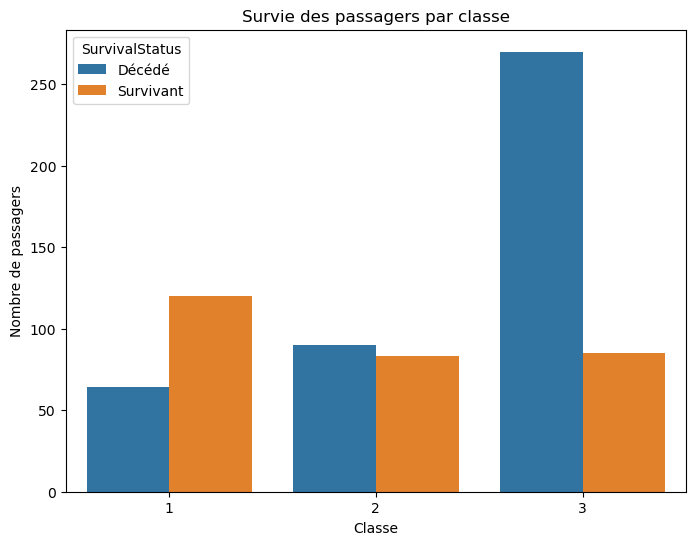

In [11]:
data_clean['SurvivalStatus'] = data_clean['Survived'].apply(lambda x: 'Survivant' if x == 1 else 'Décédé')

plt.figure(figsize=(8,6))
sns.countplot(data=data_clean, x='Pclass', hue='SurvivalStatus')
plt.title('Survie des passagers par classe')
plt.xlabel('Classe')
plt.ylabel('Nombre de passagers')
plt.show()

3. Nous énnonçons les hypothèses suivantes :

$H_0$: La survie des passagers est **indépendent** de la classe. $H_1$: La survie n'est **pas indépendent** de la classe.

4. Nous avons décidé d'utiliser un test Chi-Carré afin de tester l'indépendance de deux variables.

5. Nous validons les assomptions suivantes :
    Les échantillons sont aléatoires (comme exprimé plus haut)
    Nous avons bien 5 valeurs par combinaisons de niveaux

6. Nous calculons 

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

tableau_contingence = pd.crosstab(data_clean['Survived'], data_clean['Pclass'])

print("Tableau de contingence :\n", tableau_contingence, "\n")

chi2, p_value, dof, expected = chi2_contingency(tableau_contingence)

print(f"Statistique Chi-square : {chi2}\n")
print(f"Valeur p (pi) : {p_value}\n")
print(f"Degrés de liberté : {dof}\n")
print("Fréquences attendues :\n", expected, "\n")

n = tableau_contingence.sum().sum()
min_dim = min(tableau_contingence.shape)

alpha = 0.05
if p_value < alpha:
    print(f"Avec un alpha de {alpha}, nous rejetons l'hypothèse nulle.")
    print("Il y a des preuves statistiques suggérant une association entre la survie et la classe du billet.\n")
else:
    print(f"Avec un alpha de {alpha}, nous ne rejetons pas l'hypothèse nulle.")
    print("Il n'y a pas de preuve statistique significative suggérant une association entre la survie et la classe du billet.\n")

if min_dim == 2:
    phi = np.sqrt(chi2 / n)
    print(f"Coefficient de Phi : {phi}")
    if phi < 0.1:
        print("Association négligeable.")
    elif phi < 0.3:
        print("Association faible.")
    elif phi < 0.5:
        print("Association moyenne.")
    else:
        print("Association forte.")
else:
    V = np.sqrt((chi2/n) / (min_dim - 1))
    print(f"V de Cramer : {V}")
    if V < 0.1:
        print("Association négligeable.")
    elif V < 0.3:
        print("Association faible.")
    elif V < 0.5:
        print("Association moyenne.")
    else:
        print("Association forte.")

Tableau de contingence :
 Pclass      1   2    3
Survived              
0          64  90  270
1         120  83   85 

Statistique Chi-square : 91.08074548791019

Valeur p (pi) : 1.6675060315554636e-20

Degrés de liberté : 2

Fréquences attendues :
 [[109.57303371 103.02247191 211.40449438]
 [ 74.42696629  69.97752809 143.59550562]] 

Avec un alpha de 0.05, nous rejetons l'hypothèse nulle.
Il y a des preuves statistiques suggérant une association entre la survie et la classe du billet.

Coefficient de Phi : 0.35766240415815087
Association moyenne.


**Q3: Existe-t-il une différence d'âge entre les passagers qui ont survécu et les passagers décédés?**

1. Les variables d'intérêts sont Age et Survived
    Age est une variable quantitative continue
    Survived est une variable qualitative nominale

2. Nous avons choisi de représenter ces variables avec un "box plot"

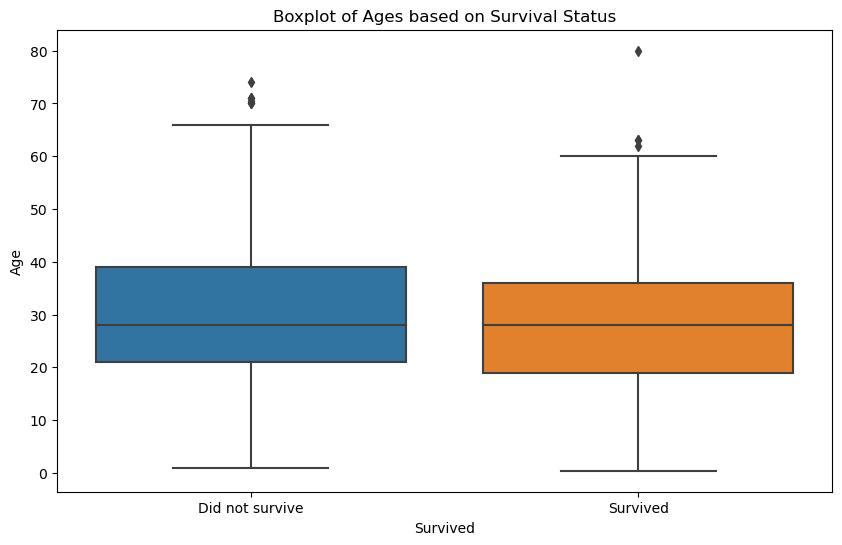

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Age', data=data_clean)
plt.title('Boxplot of Ages based on Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.show()

3. Notre hypothèse nulle est que l'âge moyen des survivants et l'âge moyen des personnes décédées est égal. L'hypothèse alternative est que l'âge moyen des personnes décédés et survivantes diffère.

\begin{align*}
H_0 : \mu_0 &= \mu_1 \quad et \quad H_1 : \mu_0 \neq \mu_1
\end{align*}

4. Il s'agit d'une comparaison entre deux moyennes, nous avons donc utilisé un t-test à deux échantillons. 

Voici la formule pour calculer la statistique t pour 2 échantillon :
$$ t = \frac{(\bar{X_1} - \bar{X_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_{1}^2}{n_1} + \frac{s_{2}^2}{n_2}}} $$
et les *degrés de libertés* de la loi $t$ de Student sont le plus petit de $n_{1}-1$ et $n_{2}-1$ 

5. Nous validons les assomptions :
    Les échantillons sont aléatoires comme montré précédement (nous travaillons toujours sur le même)
    Les échantillons sont indépendants (Pas de Schrödinger ici)
    La taille des échantillons est supérieur à 30 

In [13]:
survival_count = data_clean['Survived'].value_counts()
num_survivant = survival_count[1]
num_decede = survival_count[0]

print("Nombre de survivants:", num_survivant)
print("Nombre de décédés:", num_decede)

Nombre de survivants: 288
Nombre de décédés: 424


6. Nous calculons la statistique et la p-valeur

In [15]:
survivors = data_clean[data_clean["Survived"] == 1]['Age']
deceased = data_clean[data_clean["Survived"] == 0]['Age']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(survivors, deceased)

# Calculate Cohen's d
cohens_d = (np.mean(survivors) - np.mean(deceased)) / np.sqrt((np.std(survivors, ddof=1) ** 2 + np.std(deceased, ddof=1) ** 2) / 2)

# Make the decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print(f"t-stat: {t_stat}, p-value: {p_value}, Cohen's d: {cohens_d}")
    print("Nous rejetons l'hypothèse nulle. Il y a une différence significative dans l'âge entre les survivants et les non-survivants.")
else:
    print(f"t-stat: {t_stat}, p-value: {p_value}, Cohen's d: {cohens_d}")
    print("Nous ne rejetons pas l'hypothèse nulle. Il n'y a pas de différence significative dans l'âge entre les survivants et les non-survivants.")

t-stat: -2.2043427748445956, p-value: 0.027820316250851285, Cohen's d: -0.16755731389524692
Nous rejetons l'hypothèse nulle. Il y a une différence significative dans l'âge entre les survivants et les non-survivants.


8. Nous évaluons la taille de l'effet

In [16]:
interpretation = ""
if abs(cohens_d) <= 0.3:
    interpretation = "The effect size is small."
elif abs(cohens_d) <= 0.5:
    interpretation = "The effect size is medium."
else:
    interpretation = "The effect size is large."
print("Cohen's d:", cohens_d, interpretation)

Cohen's d: -0.16755731389524692 The effect size is small.


**Q4: Existe-t-il une relation entre l'âge des passagers et le prix des billets?**

1. Les variables d'intérêt sont l'âge et le prix des billets, ce sont des variables quantitatives et continues.

2. Nous avons choisi de les représenter avec un scatter plot.

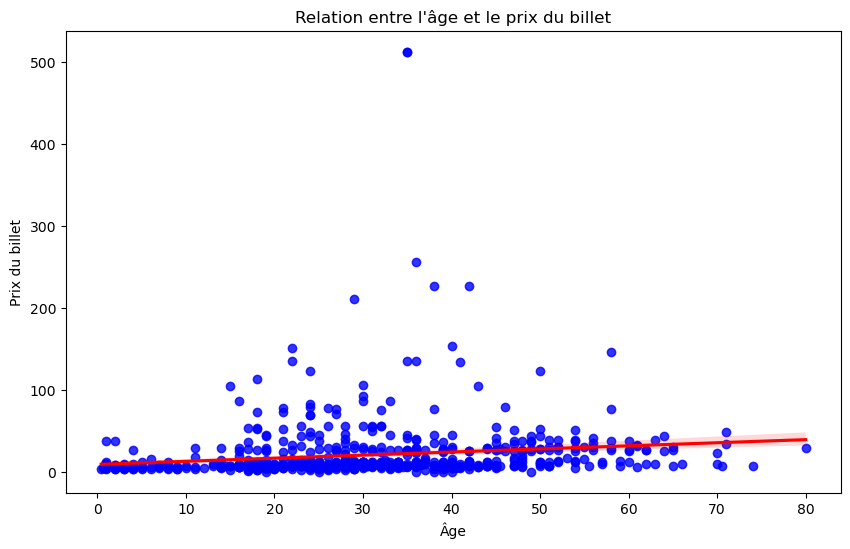

In [20]:
plt.figure(figsize=(10,6))
sns.regplot(x='Age', y='Fare', data=data_clean, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Relation entre l\'âge et le prix du billet')
plt.xlabel('Âge')
plt.ylabel('Prix du billet')
plt.show()

3. Nos hypothèses sont les suivantes :

$H_0$: Le prix des billet n'est **pas corrélé** à l'âge des passagers. $H_1$: Le prix est **corrélé** à l'âge des passagers.

4. Nous allons utiliser un T-test de corrélation afin de déterminer le degré de corrélation entre nos deux variables
5. Nous validons les assumptions suivantes :
    Les données sont quantitatives et sont obtenues à partir d’un échantillon aléatoire.
    Le scatter plot montre que les données sont approximativement liées linéairement.
    Il n’y a pas de valeurs abberantes dans les données.
    Les variables doivent chacune suivre une loi normale.

In [23]:
from scipy.stats import pearsonr
import statsmodels.api as sm

age = data_clean['Age']
fare = data_clean['Fare']

correlation_coefficient, p_value = pearsonr(age, fare)

print(f'Coefficient de corrélation : {correlation_coefficient}')
print(f'Valeur p : {p_value}')

alpha = 0.05
if p_value <= alpha:
    print('Nous rejetons l\'hypothèse nulle. Cela indique qu\'il y a une corrélation entre l\'âge des passagers et le prix du billet.')
else:
    print('Nous ne rejetons pas l\'hypothèse nulle. Cela indique qu\'il n\'y a pas de corrélation entre l\'âge des passagers et le prix du billet.')

def cohen_d(x,y):
    nx = len(x)
    ny = len(y)
    dof = nx + ny - 2
    return (np.mean(x) - np.mean(y)) / np.sqrt(((nx-1)*np.std(x, ddof=1) ** 2 + (ny-1)*np.std(y, ddof=1) ** 2) / dof)
    
r_intervalles_confiance = sm.stats.DescrStatsW(age).zconfint_mean()
print(f'Intervalles de confiance pour le coefficient de corrélation : {r_intervalles_confiance}')

model = sm.OLS(fare, sm.add_constant(age)).fit()
r_squared = model.rsquared
print(f'Coefficient de détermination (R-squared) : {r_squared}')

if correlation_coefficient > 0:
    print('La corrélation est positive, ce qui signifie que l\'âge des passagers est généralement associé à un prix de billet plus élevé.')
elif correlation_coefficient < 0:
    print('La corrélation est négative, ce qui signifie que l\'âge des passagers est généralement associé à un prix de billet plus bas.')
else:
    print('Il n\'y a pas de corrélation linéaire claire entre l\'âge des passagers et le prix du billet.')
if abs(correlation_coefficient) < 0.1:
    print('La corrélation est très faible.')
    
elif 0.1 <= abs(correlation_coefficient) < 0.3:
    print('La corrélation est faible.')
elif 0.3 <= abs(correlation_coefficient) < 0.5:
    print('La corrélation est modérée.')
else:
    print('La corrélation est forte.')

effect_size = cohen_d(age, fare)
print(f'Taille de l\'effet : {effect_size}')



Coefficient de corrélation : 0.1456331592305597
Valeur p : 9.62085909106823e-05
Nous rejetons l'hypothèse nulle. Cela indique qu'il y a une corrélation entre l'âge des passagers et le prix du billet.
Intervalles de confiance pour le coefficient de corrélation : (28.577546835690917, 30.7066385575675)
Coefficient de détermination (R-squared) : 0.021209017067473468
La corrélation est positive, ce qui signifie que l'âge des passagers est généralement associé à un prix de billet plus élevé.
La corrélation est faible.
Taille de l'effet : 0.3129577171506109


Pour chacune des questions 1 à 4 ci-dessus, argumenter de manière statistique en effectuant chacune des étapes suivantes:
1. Identifier la ou les variables d'intérêt et spécifier le type.
2. Réaliser une visualisation appropriée selon la ou les variables.
3. Enoncer une hypothèse nulle et une hypothèse alternative considérant la ou les variables identifiées.
4. Identifier le test statistique approprié selon les hypothèses énoncées.
5. Vérifier la validation des assumptions selon le test identifié.
6. Calculer la statistique ainsi que la p-valeur.
7. Prendre une décision à partir de la p-valeur et d'un seuil alpha de 5%.
8. Interpréter le résultat et évaluer la taille de l'effet.

Quelques liens utiles pour la taille de l'effet:
* [https://rpsychologist.com/cohend/](https://rpsychologist.com/cohend/)
* [https://datatab.net/tutorial/effect-size-independent-t-test](https://datatab.net/tutorial/effect-size-independent-t-test)
* [https://www.simplypsychology.org/effect-size.html](https://www.simplypsychology.org/effect-size.html)

## 3. Data mining (2 pts)

In [30]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        712 non-null    int64  
 1   Pclass          712 non-null    int64  
 2   Age             712 non-null    float64
 3   Fare            712 non-null    float64
 4   FamilySize      712 non-null    int64  
 5   Sex_male        712 non-null    int64  
 6   Embarked_Q      712 non-null    int64  
 7   Embarked_S      712 non-null    int64  
 8   SurvivalStatus  712 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 71.8+ KB


**Q1: Effectuer une analyse statistique à l'aide de la régression logistique avec comme variable dépendente la variable `Survived`. Interpréter les coefficients et discuter de leur importance statistique en vous appuyant sur leur p-valeur.**

In [38]:
import statsmodels.api as sm

y = data_clean['Survived']

log_reg = sm.Logit(y, data_clean.drop(['Survived', 'SurvivalStatus'], axis=1)).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.501181
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Tue, 12 Mar 2024   Pseudo R-squ.:                  0.2573
Time:                        10:06:10   Log-Likelihood:                -356.84
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 1.609e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.0398      0.098     -0.406      0.685      -0.232       0.152
Age           -0.0023      0.

**Q2: Effecter une analyse statistique à l'aide d'un arbre de classification avec comme variable dépendente la variable `Survived` et une profondeur maximale de 4. Visualiser l'arbre et expliquer quelques décisions.**

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got Index(['Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q',
       'Embarked_S'],
      dtype='object') instead.

<Figure size 1400x1000 with 0 Axes>

**Conclusion: Interpréter les résultats des deux analyses statistiques et résumer les points importants de votre étude.**